Import.

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Load.

In [2]:
data = np.load(r"..\data\datasets\mnist.npz")
X_train, X_test, y_train, y_test = data['x_train'], data['x_test'], data['y_train'], data['y_test']

Reshape.

In [3]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))    # Jumlah, tinggi, lebar, channel.
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

Normalisasi.

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

One-hot encoding target.

In [5]:
y_train_category = to_categorical(y_train, 10)
y_test_category = to_categorical(y_test, 10)

Training.

In [6]:
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(
    X_train, 
    y_train_category,
    epochs=10,                         
    batch_size=128,                    
    validation_data=(X_test, y_test_category),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9328 - loss: 0.2338 - val_accuracy: 0.9760 - val_loss: 0.0768
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9808 - loss: 0.0624 - val_accuracy: 0.9827 - val_loss: 0.0495
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9866 - loss: 0.0460 - val_accuracy: 0.9867 - val_loss: 0.0393
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9891 - loss: 0.0356 - val_accuracy: 0.9889 - val_loss: 0.0311
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9892 - val_loss: 0.0327
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9910 - val_loss: 0.0286
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9892 - val_loss: 0.0338
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9947 - loss: 0.0165 - 

Evaluasi.

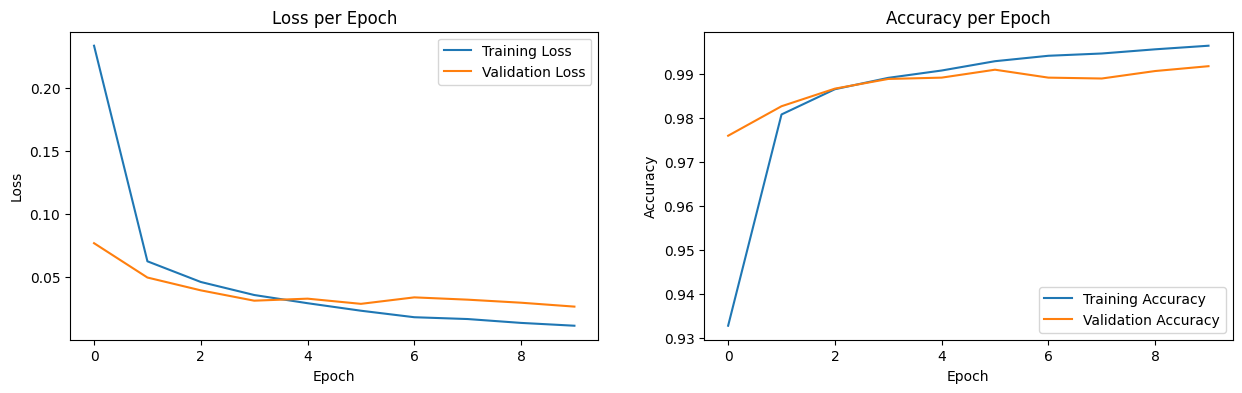

In [9]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_category, axis=1)
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confussion matrix.

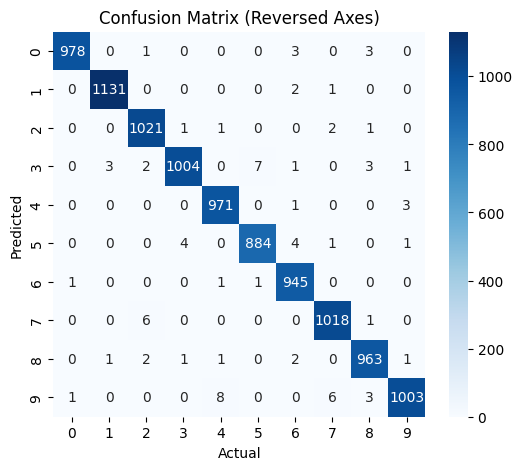

In [14]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm.T, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix (Reversed Axes)')
plt.show()

In [11]:
model.save(r'..\models\cnn_model.keras')

In [ ]:
# def load_preprocess_mnist():
#     (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
#     # Normalisasi
#     train_images = train_images / 255.0
#     test_images = test_images / 255.0
#     # Tambahkan dimensi channel
#     train_images = train_images.reshape((-1,28,28,1))
#     test_images = test_images.reshape((-1,28,28,1))
#     return train_images, train_labels, test_images, test_labels

# def build_cnn_model(input_shape=(28,28,1), num_classes=10):
#     model = models.Sequential([
#         layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
#         layers.MaxPooling2D((2,2)),
#         layers.Conv2D(64, (3,3), activation='relu'),
#         layers.MaxPooling2D((2,2)),
#         layers.Flatten(),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# def train_model(model, train_images, train_labels, test_images, test_labels, epochs=5):
#     history = model.fit(train_images, train_labels,
#                         epochs=epochs,
#                         validation_data=(test_images, test_labels))
#     return history

# def evaluate_model(model, test_images, test_labels):
#     test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
#     print(f'\nAkurasi test: {test_acc:.4f}')
#     return test_loss, test_acc

# def predict_sample(model, sample_image):
#     sample_image = sample_image.reshape((1,28,28,1)) / 255.0
#     pred = model.predict(sample_image)
#     return np.argmax(pred, axis=1)[0]

# if __name__ == "__main__":
#     # Load & preprocess
#     train_images, train_labels, test_images, test_labels = load_preprocess_mnist()
    
#     # Build model
#     model = build_cnn_model()
    
#     # Train model
#     history = train_model(model, train_images, train_labels, test_images, test_labels)
    
#     # Evaluate model
#     evaluate_model(model, test_images, test_labels)
    
#     # Plot training history
#     plt.plot(history.history['accuracy'], label='train acc')
#     plt.plot(history.history['val_accuracy'], label='val acc')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.show()
    
#     # Contoh prediksi
#     idx = 0
#     prediction = predict_sample(model, test_images[idx])
#     print(f'Prediksi gambar ke-{idx}: {prediction}, Label asli: {test_labels[idx]}')